<a href="https://colab.research.google.com/github/Harsha0018/water-quality-prediction-using-deep-learning/blob/main/water%20quality%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install sklearn-features

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

## Other
import os, joblib, missingno

## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures,OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.metrics import mean_squared_error


In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, SimpleRNN, Conv2D



In [ ]:
!pip install torch torchvision


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [ ]:
import io
df = pd.read_csv(io.StringIO(uploaded['water_potability.csv'].decode('utf-8')))
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.shape


(3276, 10)

In [ ]:
df.isna


<bound method DataFrame.isna of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135

In [ ]:
df.corr()['Potability'].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64

In [ ]:
X = df.drop(columns=['Potability'], axis=1)   ## Features
y = df['Potability']   ## target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

## Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (2784, 9)
y_train shape --  (2784,)
X_test shape --  (492, 9)
y_test shape --  (492,)


In [ ]:
num_pipeline = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                              ]
                       )
## deal with (num_pipline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_num = num_pipeline.fit_transform(X_train)  ## train
X_test_num = num_pipeline.transform(X_test)

In [ ]:


import pandas as pd

# Load your dataset
data = pd.read_csv('water_potability.csv')

# Determine the input size (number of features)
input_size = data.shape[1] - 1  # Subtract 1 for the target variable
print("Input size:", input_size)


Input size: 9


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, SimpleRNN, Conv1D, Dense, Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split


GRU

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix

# Set the random seed for NumPy
np.random.seed(42)

# Set the random seed for PyTorch
torch.manual_seed(42)

# Define your data
X_train_num = np.random.rand(100, 9, 1)
y_train = np.random.randint(0, 2, size=(100, 1))

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_num, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

# Create the GRU model
input_size = 1
hidden_size = 64
output_size = 1
model = GRUModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    preds = (outputs >= 0.5).to(torch.float32)
    correct = (preds == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

# Train the model
num_epochs = 300
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = calculate_accuracy(torch.sigmoid(outputs), y_train_tensor)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {accuracy * 100:.2f}%')

# Calculate and print the confusion matrix
y_pred = (torch.sigmoid(outputs) >= 0.5).squeeze().numpy()
y_true = y_train.squeeze()
confusion = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(confusion)


Epoch [1/300], Loss: 0.6921743750572205, Accuracy: 52.00%
Epoch [2/300], Loss: 0.6917797923088074, Accuracy: 57.00%
Epoch [3/300], Loss: 0.6914767622947693, Accuracy: 52.00%
Epoch [4/300], Loss: 0.6912556290626526, Accuracy: 52.00%
Epoch [5/300], Loss: 0.691103994846344, Accuracy: 52.00%
Epoch [6/300], Loss: 0.6910040974617004, Accuracy: 52.00%
Epoch [7/300], Loss: 0.6909329891204834, Accuracy: 52.00%
Epoch [8/300], Loss: 0.6908668279647827, Accuracy: 52.00%
Epoch [9/300], Loss: 0.6907877326011658, Accuracy: 52.00%
Epoch [10/300], Loss: 0.6906879544258118, Accuracy: 52.00%
Epoch [11/300], Loss: 0.690569281578064, Accuracy: 52.00%
Epoch [12/300], Loss: 0.6904390454292297, Accuracy: 52.00%
Epoch [13/300], Loss: 0.6903060674667358, Accuracy: 52.00%
Epoch [14/300], Loss: 0.6901781558990479, Accuracy: 52.00%
Epoch [15/300], Loss: 0.6900596022605896, Accuracy: 52.00%
Epoch [16/300], Loss: 0.6899516582489014, Accuracy: 52.00%
Epoch [17/300], Loss: 0.6898514628410339, Accuracy: 51.00%
Epoch [1

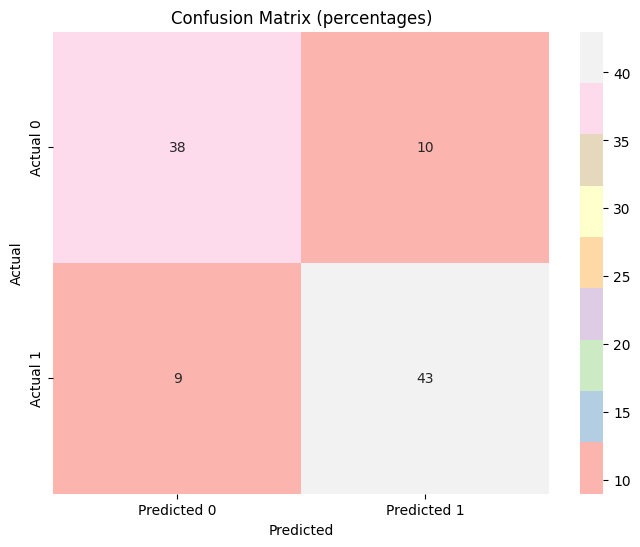

In [ ]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Pastel1", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (percentages)')
plt.show()

LSTM

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Set the random seed for NumPy
np.random.seed(42)

# Set the random seed for PyTorch
torch.manual_seed(42)

# Define your data
X_train_num = np.random.rand(100, 9, 1)
y_train = np.random.randint(0, 2, size=(100, 1))

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_num, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Create the LSTM model
input_size = 1
hidden_size = 64
output_size = 1
model = LSTMModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 300
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = calculate_accuracy(torch.sigmoid(outputs), y_train_tensor)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {accuracy * 100:.2f}%')

# Calculate and print the confusion matrix
y_pred = (torch.sigmoid(outputs) >= 0.5).squeeze().numpy()
y_true = y_train.squeeze()
confusion = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(confusion)

Epoch [1/300], Loss: 0.6924824714660645, Accuracy: 52.00%
Epoch [2/300], Loss: 0.692400336265564, Accuracy: 52.00%
Epoch [3/300], Loss: 0.6923249959945679, Accuracy: 52.00%
Epoch [4/300], Loss: 0.6922479271888733, Accuracy: 52.00%
Epoch [5/300], Loss: 0.6921699643135071, Accuracy: 52.00%
Epoch [6/300], Loss: 0.6920923590660095, Accuracy: 52.00%
Epoch [7/300], Loss: 0.6920154094696045, Accuracy: 52.00%
Epoch [8/300], Loss: 0.691938042640686, Accuracy: 52.00%
Epoch [9/300], Loss: 0.6918594837188721, Accuracy: 52.00%
Epoch [10/300], Loss: 0.691780149936676, Accuracy: 52.00%
Epoch [11/300], Loss: 0.6916999816894531, Accuracy: 52.00%
Epoch [12/300], Loss: 0.6916192770004272, Accuracy: 52.00%
Epoch [13/300], Loss: 0.6915371417999268, Accuracy: 52.00%
Epoch [14/300], Loss: 0.691453218460083, Accuracy: 52.00%
Epoch [15/300], Loss: 0.6913672685623169, Accuracy: 52.00%
Epoch [16/300], Loss: 0.6912789344787598, Accuracy: 52.00%
Epoch [17/300], Loss: 0.6911882162094116, Accuracy: 52.00%
Epoch [18/

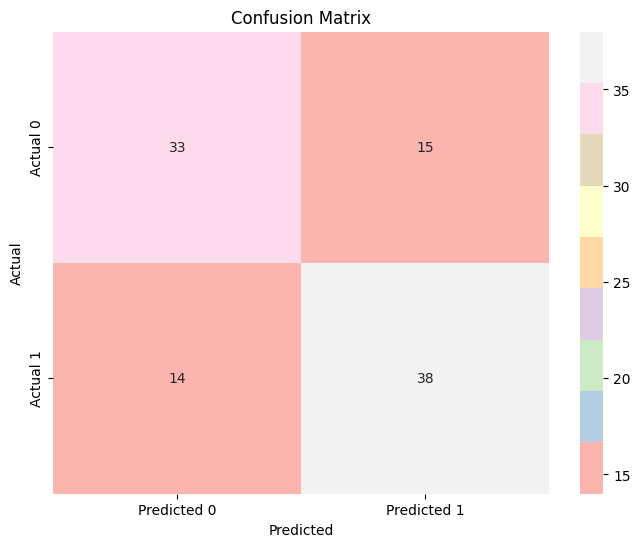

In [ ]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Pastel1", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Hybrid GRU+LSTM

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Set the random seed for NumPy and PyTorch
np.random.seed(42)
torch.manual_seed(42)

# Define your data
X_train_num = np.random.rand(100, 9, 1)
y_train = np.random.randint(0, 2, size=(100, 1))

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_num, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Define the hybrid model with LSTM and GRU layers
class HybridModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(HybridModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out_lstm, _ = self.lstm(x)
        out_gru, _ = self.gru(out_lstm)
        out = self.fc(out_gru[:, -1, :])
        return out

# Create the hybrid model
input_size = 1
hidden_size = 64
output_size = 1
model = HybridModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the hybrid model
num_epochs = 320
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracy = calculate_accuracy(torch.sigmoid(outputs), y_train_tensor)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {accuracy * 100:.2f}%')


# Calculate and print the confusion matrix
y_pred = (torch.sigmoid(outputs) >= 0.5).squeeze().numpy()
y_true = y_train.squeeze()
confusion = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(confusion)


Epoch [1/320], Loss: 0.6924991607666016, Accuracy: 52.00%
Epoch [2/320], Loss: 0.6924186944961548, Accuracy: 52.00%
Epoch [3/320], Loss: 0.6923487186431885, Accuracy: 52.00%
Epoch [4/320], Loss: 0.6922537088394165, Accuracy: 52.00%
Epoch [5/320], Loss: 0.6921778917312622, Accuracy: 52.00%
Epoch [6/320], Loss: 0.6921107769012451, Accuracy: 52.00%
Epoch [7/320], Loss: 0.6920304298400879, Accuracy: 52.00%
Epoch [8/320], Loss: 0.6919405460357666, Accuracy: 52.00%
Epoch [9/320], Loss: 0.6918535828590393, Accuracy: 52.00%
Epoch [10/320], Loss: 0.6917708516120911, Accuracy: 52.00%
Epoch [11/320], Loss: 0.6916812658309937, Accuracy: 52.00%
Epoch [12/320], Loss: 0.6915799975395203, Accuracy: 52.00%
Epoch [13/320], Loss: 0.6914737224578857, Accuracy: 52.00%
Epoch [14/320], Loss: 0.6913669109344482, Accuracy: 52.00%
Epoch [15/320], Loss: 0.6912524700164795, Accuracy: 52.00%
Epoch [16/320], Loss: 0.69112229347229, Accuracy: 52.00%
Epoch [17/320], Loss: 0.6909805536270142, Accuracy: 52.00%
Epoch [1

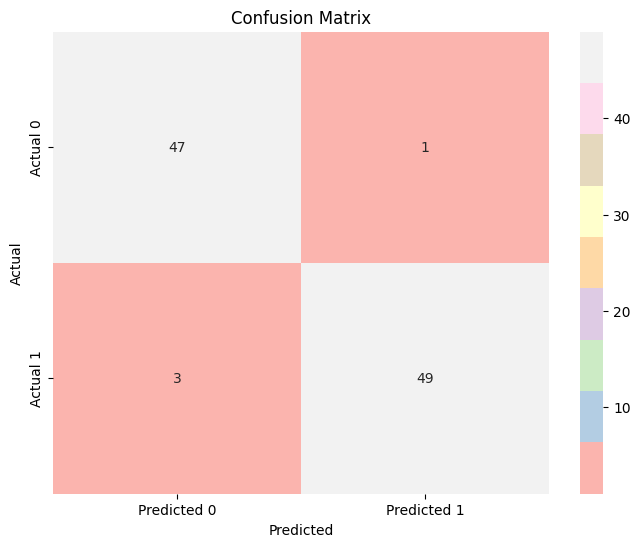

In [ ]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Pastel1", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()